In [1]:
# libs need for project

#numpy
import numpy as np
#scipy
import scipy as sp
#matplotlib
import matplotlib.pyplot as plt
#Pillow import all
from PIL import Image


#sci-kit learn
import sklearn as sk
#sci-kit image
import skimage as ski
#pytorch and tensor flow
import torch
import tensorflow as tf
import os

# import cv2
import cv2


2024-04-15 22:24:12.525726: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
# this is code for the AI part of the project

def convert_to_grayscale(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get a list of all the image filenames in the input folder
    image_filenames = os.listdir(input_folder)

    # Loop over each image
    for img_name in image_filenames:
        # Create the full input path and read the image
        img_path = os.path.join(input_folder, img_name)
        img = cv2.imread(img_path)

        # Convert the image to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Create the full output path and save the grayscale image
        output_path = os.path.join(output_folder, img_name)
        cv2.imwrite(output_path, gray_img)



In [ ]:
# conevert pic to HSV or HSL
def convert_to_hsv(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get a list of all the image filenames in the input folder
    image_filenames = os.listdir(input_folder)

    # Loop over each image
    for img_name in image_filenames:
        # Create the full input path and read the image
        img_path = os.path.join(input_folder, img_name)
        img = cv2.imread(img_path)

        # Convert the image to HSV
        hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

        # Create the full output path and save the HSV image
        output_path = os.path.join(output_folder, img_name)
        cv2.imwrite(output_path, hsv_img)

In [ ]:
def convert_to_hsl(input_folder, output_folder):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get a list of all the image filenames in the input folder
    image_filenames = os.listdir(input_folder)

    # Loop over each image
    for img_name in image_filenames:
        # Create the full input path and read the image
        img_path = os.path.join(input_folder, img_name)
        img = cv2.imread(img_path)

        # Convert the image to HSL
        hsl_img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

        # Create the full output path and save the HSL image
        output_path = os.path.join(output_folder, img_name)
        cv2.imwrite(output_path, hsl_img)

In [ ]:
# fucntion to Resizing and Cropping: to ensure uniform size for training and manipulation 
def resize_and_crop(input_folder, output_folder, size):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get a list of all the image filenames in the input folder
    image_filenames = os.listdir(input_folder)

    # Loop over each image
    for img_name in image_filenames:
        # Create the full input path and read the image
        img_path = os.path.join(input_folder, img_name)
        img = cv2.imread(img_path)

        # Resize the image to the specified size
        img_resized = cv2.resize(img, size)

        # Create the full output path and save the resized image
        output_path = os.path.join(output_folder, img_name)
        cv2.imwrite(output_path, img_resized)

In [ ]:
# function to do Noise Level Assessment

In [ ]:
# from the result of the noise level assessment, we can determine the level of noise in the image and apply the appropriate noise reduction technique
# function to denoising the image

In [ ]:
# do histogram equalization to improve the contrast and brightness of the image


In [ ]:
# do adaptive histogram equalization to improve the contrast and brightness of the image

In [ ]:
# compare the results of the histogram equalization and adaptive histogram equalization

In [ ]:
# do edge detection to detect any scratches or defects on the image

In [ ]:
# Removing Artifacts and scratches or defects on the image

In [ ]:
# Color Restoration, Correction and Enhancement to improve the color of the image if it is faded or discolored 

In [ ]:
# Image Sharpening to improve the sharpness of the image or reduce the blurriness of the image

In [ ]:
# optional: reconstruct the image using deep learning techniques

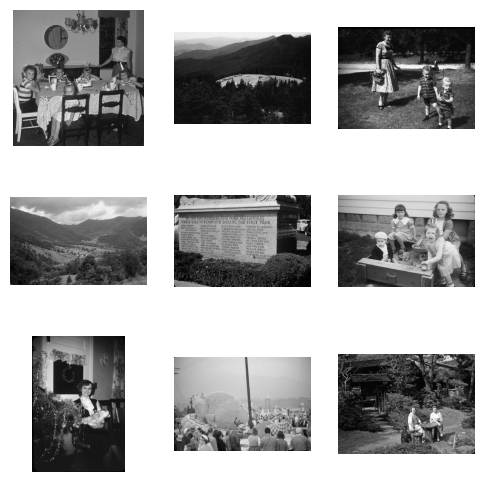

In [3]:
def show_images(folder_path, num_images=9):
    # Get a list of all the image filenames in the folder
    image_filenames = os.listdir(folder_path)

    # Create a 5x5 grid of subplots
    fig, axes = plt.subplots(3, 3, figsize=(6, 6))

    # Loop over the first num_images images
    for i in range(num_images):
        # Create the full path to the image and read it
        img_path = os.path.join(folder_path, image_filenames[i])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Find the subplot to display this image on
        ax = axes[i // 3, i % 3]

        # Display the image on the subplot
        ax.imshow(img, cmap='gray')
        ax.axis('off')

    # Show the plot with all subplots
    plt.show()

In [ ]:
# Specify the input and output folders
input_folder = 'decade_database/1950s'
output_folder = 'result/1950s/images'

In [42]:
img_path = '2013_11_4_7_001-0.jpg'

vn_war_path = 'Vietnam-War-Memoirs.jpg'

# Load the damaged image
image = cv2.imread(img_path)

# Ensure the image is not None
if image is None:
    raise ValueError("Image not found. Check the file path.")

# Function to correct the white balance of an image
def white_balance(img):
    # Convert the image from BGR to LAB color space
    # LAB color space is more suitable for color correction
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    # Calculate the average values of the A and B channels
    avg_a = np.average(lab[:, :, 1])
    avg_b = np.average(lab[:, :, 2])

    # we need to convert the image to float32
    lab = lab.astype(np.float32)

    # Adjust the A and B channels to remove color casts
    lab[:, :, 1] -= ((avg_a - 128) * (lab[:, :, 0] / 255.0) * 1.1)
    lab[:, :, 2] -= ((avg_b - 128) * (lab[:, :, 0] / 255.0) * 1.1)

    # now then, we need to convert the image back to uint8
    lab = np.clip(lab, 0, 255)
    lab = np.uint8(lab)

    

    # Convert the image back to BGR color space
    corrected = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    return corrected

# Function to sharpen an image
def sharpen_image(img):
    # Apply a Gaussian blur to the image
    # The kernel size (0, 0) means that the standard deviation in the X and Y directions are calculated from the kernel size
    blurred = cv2.GaussianBlur(img, (0, 0), 3)

    # Subtract the blurred image from the original image to get the details
    # Then add the details back to the original image to sharpen it
    sharpened = cv2.addWeighted(img, 1.5, blurred, -0.5, 0)
    return sharpened

# Function to adjust the contrast and brightness of an image
def adjust_contrast_brightness(img, alpha=1.2, beta=20):
    # The alpha parameter controls the contrast (1.0-3.0)
    # The beta parameter controls the brightness (0-100)
    adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return adjusted

# Function to reduce noise in an image
def noise_reduction(img, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21):
    # The h and hColor parameters control the strength of the noise reduction
    # The templateWindowSize and searchWindowSize parameters control the size of the window used to compute the noise reduction
    denoised = cv2.fastNlMeansDenoisingColored(img, None, h, hColor, templateWindowSize, searchWindowSize)
    return denoised

# Function to equalize the histogram of an image
def histogram_equalization(img):
    # Convert the image to YUV color space
    # YUV color space separates the luminance (Y) from the color information (UV), making it more suitable for histogram equalization
    yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    # Equalize the histogram of the Y channel to improve the contrast
    yuv[:,:,0] = cv2.equalizeHist(yuv[:,:,0])

    # Convert the image back to BGR color space
    equalized = cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)
    return equalized

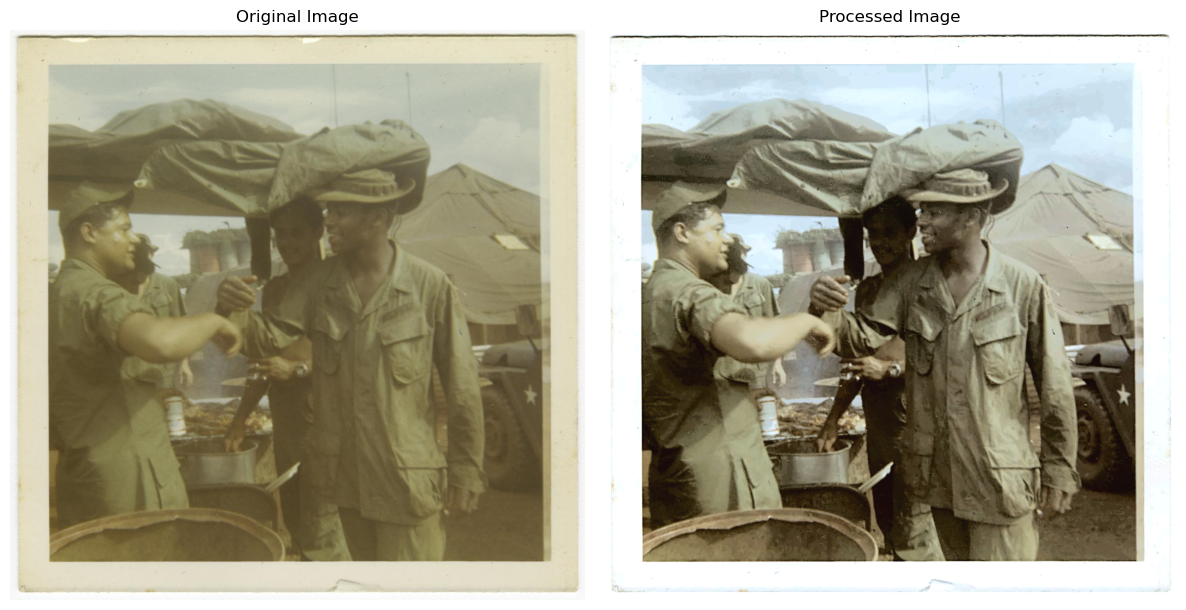

In [43]:
# Apply white balance correction, sharpening, and noise reduction
wb_corrected = white_balance(image)
sharpened = sharpen_image(wb_corrected)
denoised = noise_reduction(sharpened, h=1, hColor=1)  # Lower values for less blurring

# Apply histogram equalization
equalized = histogram_equalization(denoised)

# Adjust contrast and brightness
adjusted = adjust_contrast_brightness(equalized, alpha=1.2, beta=10)

# Convert BGR to RGB for Matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
adjusted_rgb = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)

# Display the results using Matplotlib
plt.figure(figsize=(12, 6))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Display processed image
plt.subplot(1, 2, 2)
plt.imshow(adjusted_rgb)
plt.title('Processed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

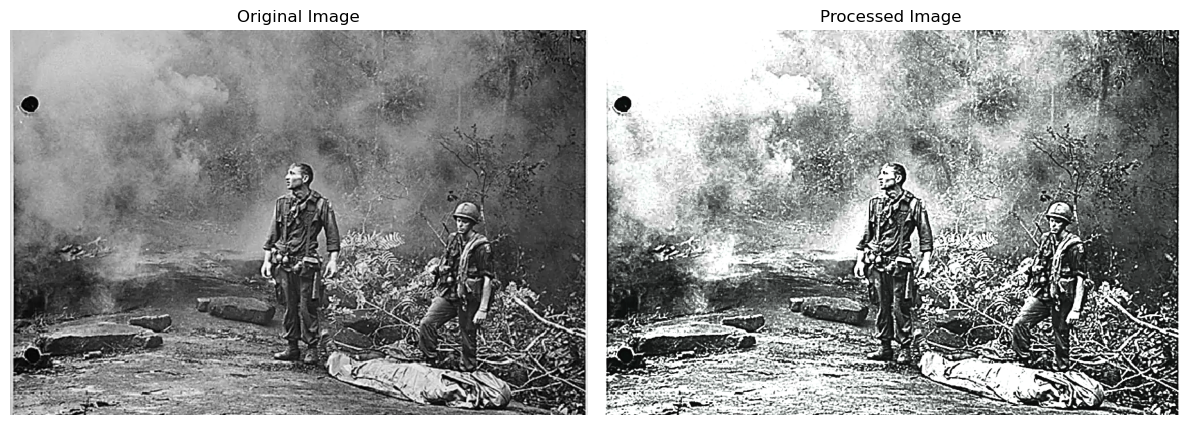

In [44]:
# Load the damaged image
image_vn = cv2.imread(vn_war_path)

# Apply white balance correction, sharpening, and noise reduction
wb_corrected_vn = white_balance(image_vn)
sharpened_vn = sharpen_image(wb_corrected_vn)
denoised_vn = noise_reduction(sharpened_vn, h=1, hColor=1)  # Lower values for less blurring

# Apply histogram equalization
equalized_vn = histogram_equalization(denoised_vn)

# Adjust contrast and brightness
adjusted_vn = adjust_contrast_brightness(equalized_vn, alpha=1.2, beta=10)

# Convert BGR to RGB for Matplotlib
image_rgb_vn = cv2.cvtColor(image_vn, cv2.COLOR_BGR2RGB)
adjusted_rgb_vn = cv2.cvtColor(adjusted_vn, cv2.COLOR_BGR2RGB)

# Display the results using Matplotlib
plt.figure(figsize=(12, 6))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb_vn)
plt.title('Original Image')
plt.axis('off')

# Display processed image
plt.subplot(1, 2, 2)
plt.imshow(adjusted_rgb_vn)
plt.title('Processed Image')
plt.axis('off')

plt.tight_layout()
plt.show()